In [ ]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../..')

# Mini process example

In [54]:
from tqdm import tqdm

In [ ]:
# population
pop_creator = PopulationCreator(genome_blueprint)
pop = pop_creator.create.det(7) + pop_creator.create.rand(500)
pop.drop_duplicates()
pop.define()

#environment
env = Environment()
env.config.set_process(dummy_process)
env.config.set_output_varibles('time', 'profit')

# iterarions
n_generations = 20
pbar = tqdm(range(n_generations))
profit = 0
for _ in pbar:
    pbar.set_description(f'[mean profit: {profit}] Simulating...')
    env.simulate(pop)
    profit = round(pop.datasets.output['profit'].mean(), 2)
    pbar.set_description(f'[mean profit: {profit}] Applying Fitness Criteria...')
    pop.apply_fitness.multi_objective.pareto(['time', 'profit'], objectives=['min', 'max'])
    pbar.set_description(f'[mean profit: {profit}] Selecting...')
    pop = pop.select()
    pbar.set_description(f'[mean profit: {profit}] Generating Offspring...')
    pop.reproduce.tournament(n_dispute=4)

[mean profit: 808.9037940379404] Generating Offspring...:  60%|██████    | 12/20 [01:07<00:42,  5.29s/it]     

<AxesSubplot:xlabel='generation', ylabel='profit'>

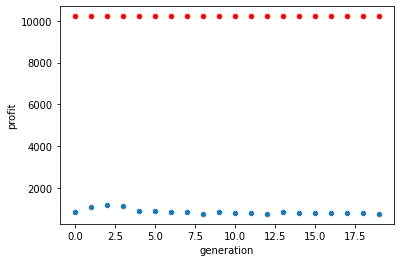

In [59]:
pop.plot.history('profit', 'mean', 'max')